# W266 Project

### Adam Sayre & Erin Werner

## Logistic Regression Model (Baseline)

Our goal is to build several machine learning model to help us classify which emotion the tweet represent. To start, we will build a logistic regression model to serve as our baseline. It is a simple yet powerful linear model that is a form of regression between 0 and 1 based on the input feature vector, which is useful in classification. This will then be compared to the more advanced methods involving BERT and neural networks.

First, we will run the model on the dataset cleaned content.

In [1]:
import numpy as np
import csv
import pandas as pd 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import importlib
import nltk
import re
from os import path
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
# Keras libraries
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
#from tensorflow.keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models
from tensorflow.keras import layers
import tensorflow.keras

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [4]:
data = pd.read_csv("~/Downloads/dataset(clean).csv") 
data.head()

,Emotion,Content,Original Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t..."
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...


In [5]:
data_e = pd.read_csv("~/Downloads/dataset(clean)_e.csv") 
data_e.head()[['Emotion','Content','Original Content','E_Content']]

,Emotion,Content,Original Content,E_Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...,rt usertaginstance usertaginstance oh fuck wro...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...,feeling little bit defeated steps faith would ...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t...",usertaginstance imagine reaction guy called jj...
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...,wouldnt feel burdened would live life testamen...


In [6]:
data_a = pd.read_csv("~/Downloads/dataset(clean)_a.csv") 
data_a.head()[['Emotion','Content','Original Content','A_Content']]

,Emotion,Content,Original Content,A_Content
0,disappointed,oh fuck did i wrote fil grinningfacewithsweat ...,b'RT @Davbingodav: @mcrackins Oh fuck.... did ...,b rt davbingodav mcrackins oh fuck wrote fil g...
1,disappointed,i feel nor am i shamed by it,i feel nor am i shamed by it,feel shamed
2,disappointed,i had been feeling a little bit defeated by th...,i had been feeling a little bit defeated by th...,feeling little bit defeated steps faith would ...
3,happy,imagine if that reaction guy that called jj kf...,"b""@KSIOlajidebt imagine if that reaction guy t...",b ksiolajidebt imagine reaction guy called jj ...
4,disappointed,i wouldnt feel burdened so that i would live m...,i wouldnt feel burdened so that i would live m...,wouldnt feel burdened would live life testamen...


#### Original Cleaned Data

In [7]:
possible_labels = data.Emotion.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'disappointed': 0, 'happy': 1, 'angry': 2}

In [8]:
data['label'] = data.Emotion.replace(label_dict)

In [9]:
X_train_c, X_val_c, y_train_c, y_val_c = train_test_split(data.Content.values, data.label.values, test_size=0.3, 
                                                  random_state=42, stratify=data.label.values)

We need to vectorize our input sentences in order to perform the logistic regression.

In [10]:
vectorizer_c = CountVectorizer()
vectorizer_c.fit(X_train_c)

X_train_c = vectorizer_c.transform(X_train_c)
X_val_c  = vectorizer_c.transform(X_val_c)
X_train_c

<641602x137520 sparse matrix of type '<class 'numpy.int64'>'
	with 7220343 stored elements in Compressed Sparse Row format>

In [11]:
classifier_c = LogisticRegression(max_iter = 1000)
classifier_c.fit(X_train_c, y_train_c)
score_c = classifier_c.score(X_val_c, y_val_c)

print("Accuracy:", score_c)

Accuracy: 0.8948878617173323


In [12]:
y_pred_c = classifier_c.predict(X_val_c)
f1_score_c = f1_score(y_val_c, y_pred_c, average='weighted')

print("F1 Score:", f1_score_c)

F1 Score: 0.8953779925281025


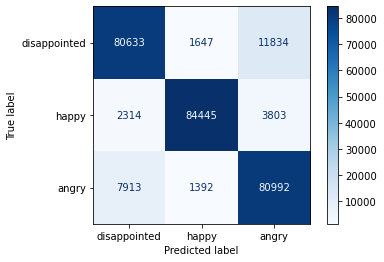

In [13]:
plot_confusion_matrix(classifier_c, X_val_c, y_val_c,display_labels=possible_labels,cmap=plt.cm.Blues)

Our logistic regression model is 89% accurate, making it a good baseline model.

#### Original Uncleaned Data

In [14]:
data["Original_Content"] = data["Original Content"]

In [15]:
X_train_oc, X_val_oc, y_train_oc, y_val_oc = train_test_split(data.Original_Content.values, data.label.values, 
                                                  test_size=0.3, random_state=42, stratify = data.label.values)

In [16]:
vectorizer_oc = CountVectorizer()
vectorizer_oc.fit(X_train_oc)

X_train_oc = vectorizer_oc.transform(X_train_oc)
X_val_oc  = vectorizer_oc.transform(X_val_oc)
X_train_oc

<641602x481718 sparse matrix of type '<class 'numpy.int64'>'
	with 8042805 stored elements in Compressed Sparse Row format>

In [17]:
classifier_oc = LogisticRegression(max_iter = 1000)
classifier_oc.fit(X_train_oc, y_train_oc)
score_oc = classifier_oc.score(X_val_oc, y_val_oc)

print("Accuracy:", score_oc)

Accuracy: 0.9000338215024748


In [18]:
y_pred_oc = classifier_oc.predict(X_val_oc)
f1_score_oc = f1_score(y_val_oc, y_pred_oc, average='weighted')

print("F1 Score:", f1_score_oc)

F1 Score: 0.9004368911378267


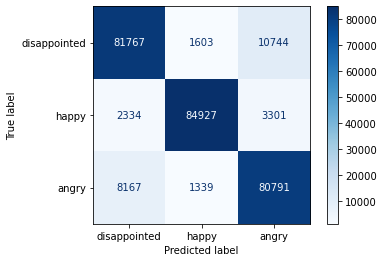

In [19]:
plot_confusion_matrix(classifier_oc, X_val_oc, y_val_oc,display_labels=possible_labels,cmap=plt.cm.Blues)

The uncleaned data actually recieved a better accuracy score of 90%. 

#### Custom Cleaned Data #1

Now, we will run the same logistic regression model on our personally cleaned tweets.

In [20]:
possible_labels_e = data_e.Emotion.unique()

label_dict_e = {}
for index, possible_label in enumerate(possible_labels_e):
    label_dict_e[possible_label] = index
label_dict_e

{'disappointed': 0, 'happy': 1, 'angry': 2}

In [21]:
data_e['label'] = data_e.Emotion.replace(label_dict_e)

In [22]:
X_train_e, X_val_e, y_train_e, y_val_e = train_test_split(data_e.E_Content.values, data_e.label.values, 
                                                  test_size=0.30,random_state=42, stratify=data_e.label.values)

In [23]:
vectorizer_e = CountVectorizer()
vectorizer_e.fit(X_train_e)

X_train_e = vectorizer_e.transform(X_train_e)
X_val_e  = vectorizer_e.transform(X_val_e)
X_train_e

<641602x248526 sparse matrix of type '<class 'numpy.int64'>'
	with 5641629 stored elements in Compressed Sparse Row format>

In [24]:
classifier_e = LogisticRegression(max_iter = 1000)
classifier_e.fit(X_train_e, y_train_e)
score_e = classifier_e.score(X_val_e, y_val_e)

print("Accuracy:", score_e)

Accuracy: 0.894051415957203


In [25]:
y_pred_e = classifier_e.predict(X_val_e)
f1_score_e = f1_score(y_val_e, y_pred_e, average='weighted')

print("F1 Score:", f1_score_e)

F1 Score: 0.8944883271846511


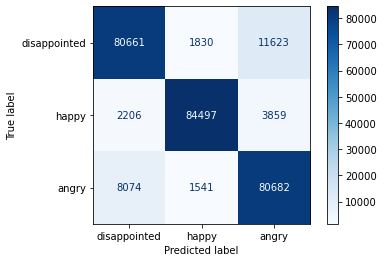

In [26]:
plot_confusion_matrix(classifier_e, X_val_e, y_val_e,display_labels=possible_labels_e,cmap=plt.cm.Blues)

Our personal cleaning method performed roughly the same as the original cleaned dataset.

#### Custom Cleaned Data #2

In [27]:
# Some starting variables
vocab_size = 10000
max_length = 40

X = data['Original Content'].to_numpy()
y = data.Emotion.to_numpy()

# First split the data into train and test
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(X, y, test_size=0.10, random_state=42)

# Next split the train data into train and dev data
X_train_a, X_dev_a, y_train_a, y_dev_a = train_test_split(X_train_a, y_train_a, test_size=0.33, random_state=42)

In [28]:
# Tokenizing
tk = Tokenizer(num_words = vocab_size, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{"}~\t\n', lower=True, split = " ")
tk.fit_on_texts(X_train_a)

X_train_seq = tk.texts_to_sequences(X_train_a)
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=max_length)

X_dev_seq = tk.texts_to_sequences(X_dev_a)
X_dev_seq_trunc = pad_sequences(X_dev_seq, maxlen=max_length)

X_test_seq = tk.texts_to_sequences(X_test_a)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=max_length)

# Encoding output variable
le = LabelEncoder()

y_train_le = le.fit_transform(y_train_a)
y_train_emb = to_categorical(y_train_le)

y_dev_le = le.transform(y_dev_a)
y_dev_emb = to_categorical(y_dev_le)

y_test_le = le.transform(y_test_a)
y_test_emb = to_categorical(y_test_le)

In [29]:
# Use these for training!
X_train_final_a = X_train_seq_trunc
X_dev_final_a = X_dev_seq_trunc
X_test_final_a = X_test_seq_trunc

y_train_final_a = y_train_emb
y_dev_final_a = y_dev_emb
y_test_final_a = y_test_emb

In [30]:
#read from dataframe
possible_labels_a = data_a.Emotion.unique()

label_dict_a = {}
for index, possible_label in enumerate(possible_labels_a):
    label_dict_a[possible_label] = index
label_dict_a
data_a['label'] = data_a.Emotion.replace(label_dict_a)

In [31]:
X_train_a, X_val_a, y_train_a, y_val_a = train_test_split(data_a.A_Content.values, data_a.label.values, 
                                                  test_size=0.30,random_state=42, stratify=data_a.label.values)

In [32]:
vectorizer_a = CountVectorizer()
vectorizer_a.fit(X_train_a)

X_train_a = vectorizer_a.transform(X_train_a)
X_val_a  = vectorizer_a.transform(X_val_a)
X_train_a

<641602x453777 sparse matrix of type '<class 'numpy.int64'>'
	with 5790974 stored elements in Compressed Sparse Row format>

In [33]:
classifier_a = LogisticRegression(max_iter = 1000)
classifier_a.fit(X_train_a, y_train_a)
score_a = classifier_a.score(X_val_a, y_val_a)

print("Accuracy:", score_a)

Accuracy: 0.896160713961007


In [34]:
y_pred_a = classifier_a.predict(X_val_a)
f1_score_a = f1_score(y_val_a, y_pred_a, average='weighted')

print("F1 Score:", f1_score_a)

F1 Score: 0.8965497764630669


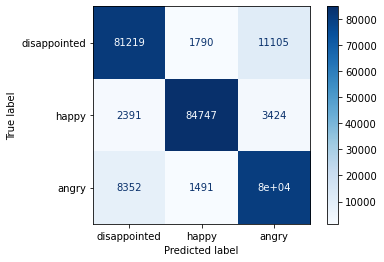

In [35]:
plot_confusion_matrix(classifier_a, X_val_a, y_val_a,display_labels=possible_labels_a,cmap=plt.cm.Blues)

Our other personal cleaning method performed roughly the same as the original cleaned dataset.

#### Results

In [36]:
lr_acc = [score_oc, score_c, score_e, score_a]
lr_f1 = [f1_score_oc, f1_score_c, f1_score_e, f1_score_a]
lr_values = ['Orig. Uncleaned', 'Orig. Cleaned', 'Custom Cleaned #1', 'Custom Cleaned #2']
lr_df = pd.DataFrame()
lr_df['Cleaning Method'] = lr_values
lr_df['Accuracy'] = lr_acc
lr_df['F1 Score'] = lr_f1
lr_df

,Cleaning Method,Accuracy,F1 Score
0,Orig. Uncleaned,0.900034,0.900437
1,Orig. Cleaned,0.894888,0.895378
2,Custom Cleaned #1,0.894051,0.894488
3,Custom Cleaned #2,0.896161,0.896550
